<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

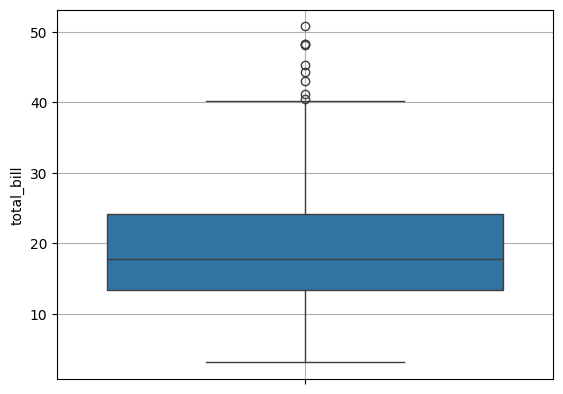

In [8]:
sns.boxplot(data=tips, y='total_bill')

plt.grid()
plt.show()

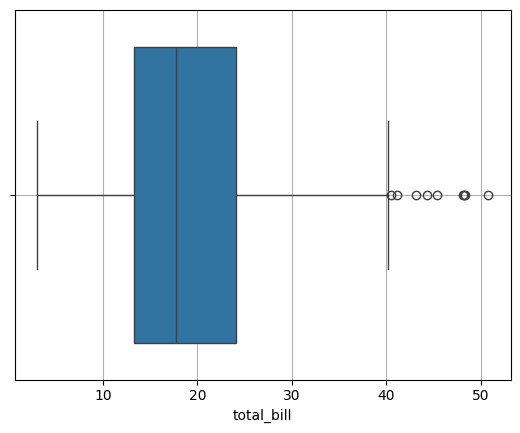

In [9]:
sns.boxplot(data=tips, x='total_bill')
plt.grid()
plt.show()

## 성별 팁의 box plot

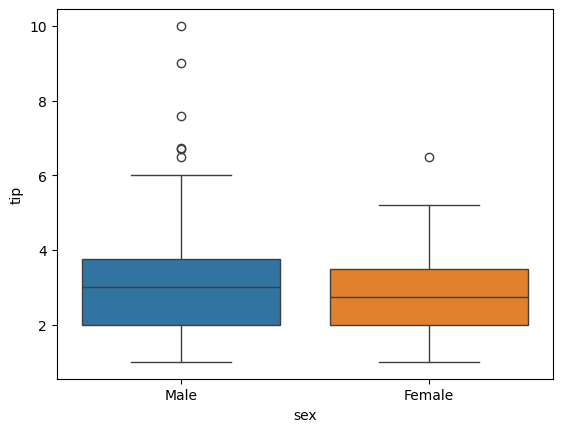

In [11]:
sns.boxplot(data=tips, x = 'sex', y='tip', hue='sex')
plt.show()

In [15]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [16]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


## 흡연 여부별 팁의 박스 boxplot

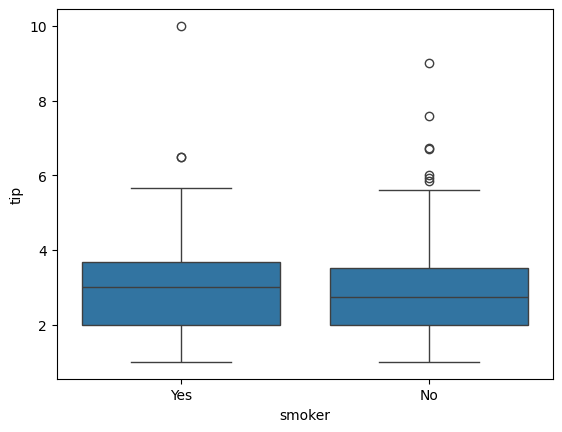

In [20]:
sns.boxplot(data=tips, x='smoker', y='tip')

plt.show()

## 요일별 팁의 box plot

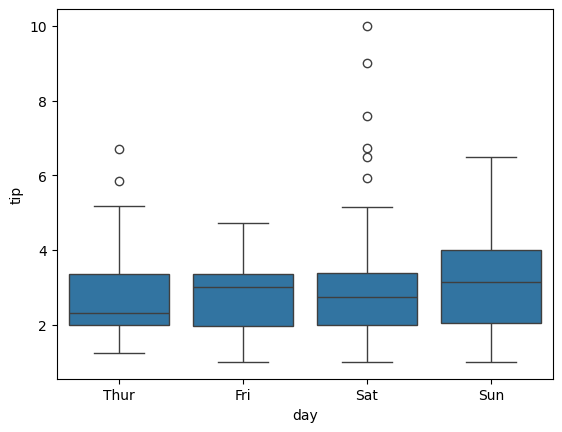

In [22]:
sns.boxplot(data=tips, x='day', y='tip')

plt.show()

## 시간별 팁의 box plot

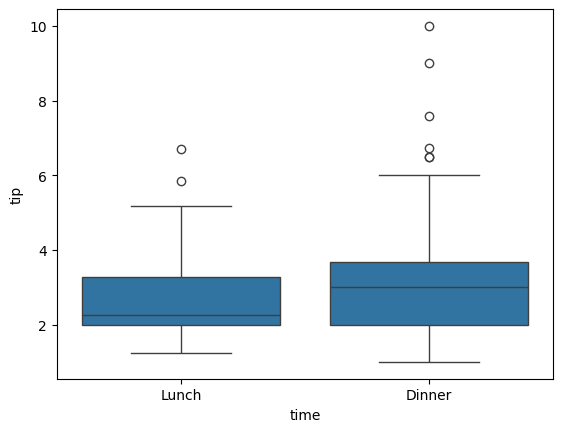

In [23]:
sns.boxplot(data=tips, x='time', y='tip')

plt.show()

## 요일별, 성별 팁의 box plot

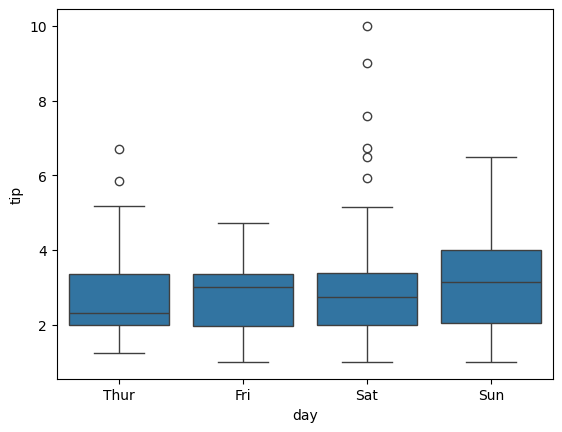

In [32]:
sns.boxplot(data=tips, x='day', y='tip')

plt.show()

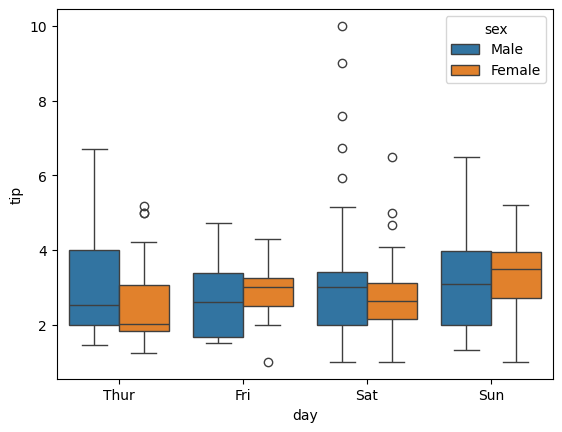

In [49]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')

plt.show()

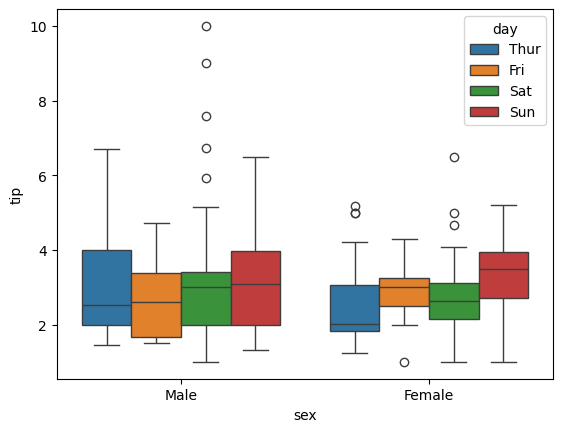

In [51]:
sns.boxplot(data=tips, x='sex', y='tip', hue='day')

plt.show()

## 2개 이상의 Axes 사용하기

Figure에 Axes(nrows=1, ncols=2) 2개를 생성하고, 성별 tip의 box plot과 시간별 tip의 box plot을 그리세요.

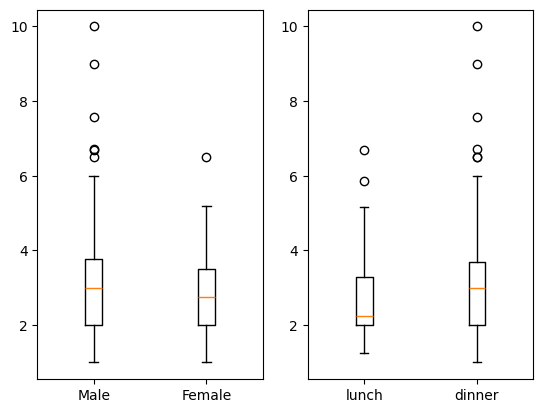

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2)

male = tips[tips.sex == 'Male'].tip
female = tips[tips.sex == 'Female'].tip
lunch = tips[tips.time == 'Lunch'].tip
dinner = tips[tips.time == 'Dinner'].tip

ax[0].boxplot(x=[male, female], tick_labels=['Male', 'Female'])
ax[1].boxplot(x=[lunch, dinner], tick_labels=['lunch', 'dinner'])

plt.show()

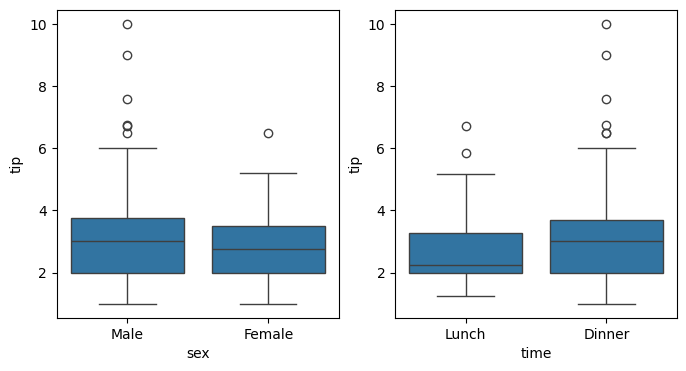

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(data=tips, x='sex', y='tip', ax=axes[0])
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1])

plt.show()

## Histogram(히스토그램)

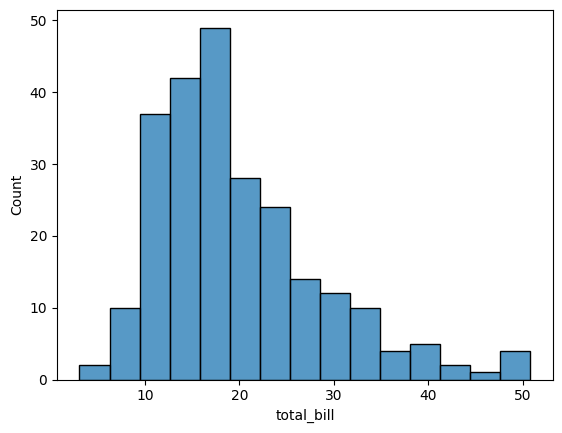

In [79]:
sns.histplot(data=tips, x='total_bill', bins=15)    # 막대의 개수 조정 bins

plt.show()

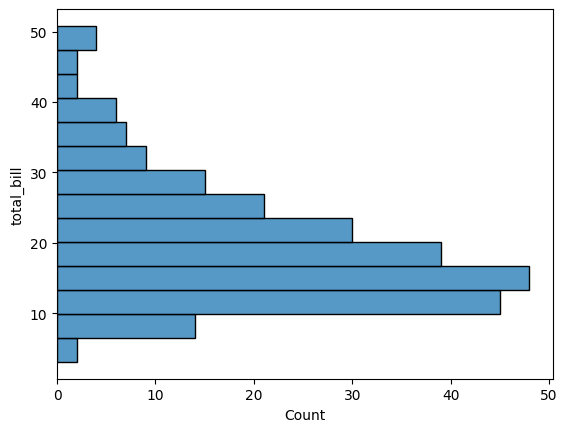

In [82]:
sns.histplot(data=tips, y='total_bill')
plt.show()

Figure, Axes(nrows=2, ncols=1) 2개를 생성, 위쪽에는 tip의 box plot, 아래쪽에는 tip의 histogram을 그리세요.

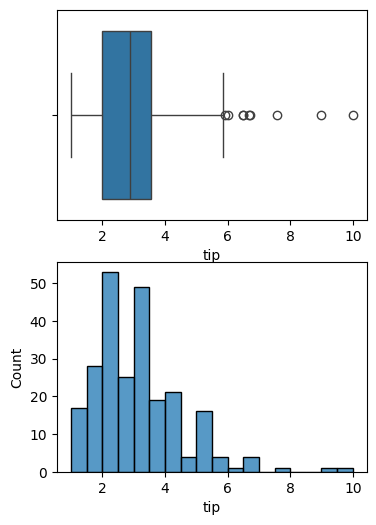

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,6))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', ax=axes[1])

plt.show()

# 막대 그래프

## countplot()

카테고리(범주) 타입 변수의 빈도수를 막대로 시각화.

In [91]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


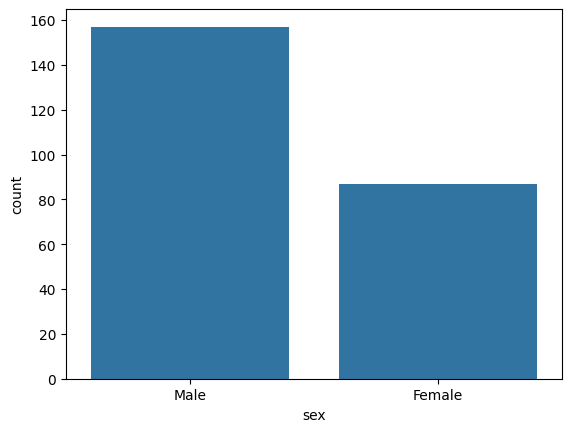

In [93]:
sns.countplot(data=tips, x='sex')

plt.show()

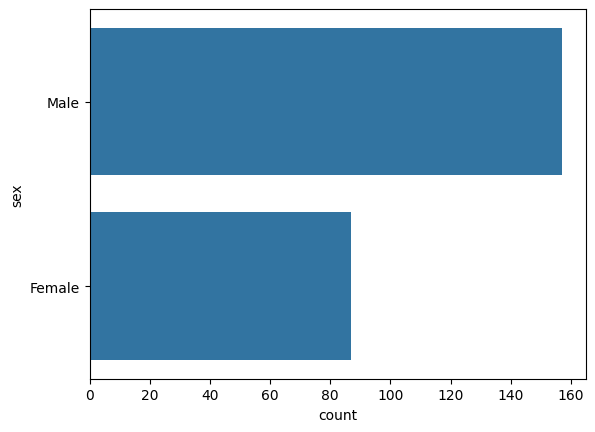

In [94]:
sns.countplot(data=tips, y='sex')

plt.show()

요일별 빈도수 막대 그래프

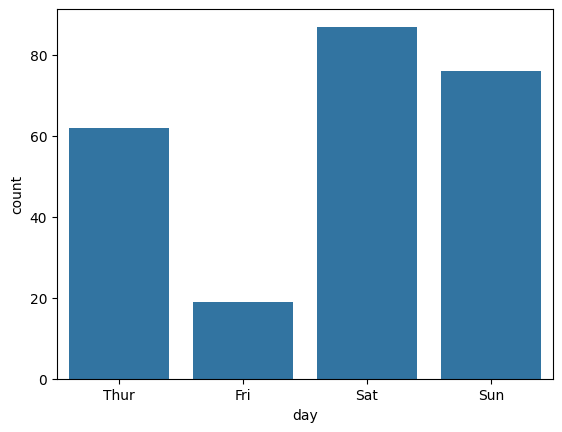

In [104]:
sns.countplot(data=tips, x='day')  # order=tips.day.value_counts().index

plt.show()

In [128]:
tips.day.value_counts() # count 별 내림차순 정렬

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=19, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=76, angle=0)


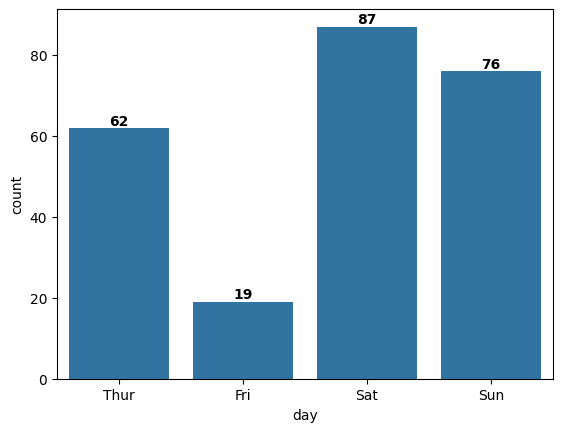

In [134]:
fig, ax = plt.subplots()
sns.countplot(data=tips, x='day')
for p in ax.patches:
    print(p)
    ax.text(x=p.get_x() + p.get_width() / 2,        # 텍스트를 그릴 x 좌표
            y=p.get_y() + p.get_height() + 0.8,     # 텍스트를 그릴 y 좌표
            s=f'{p.get_height():.0f}',              # 표시할 텍스트 내용
            ha='center',                            # horizontal align(수평(좌우)정렬)
            fontweight='bold')                      # font weight : light, regular, bold, ...

plt.show()

요일별 성별 빈도수 막대 그래프

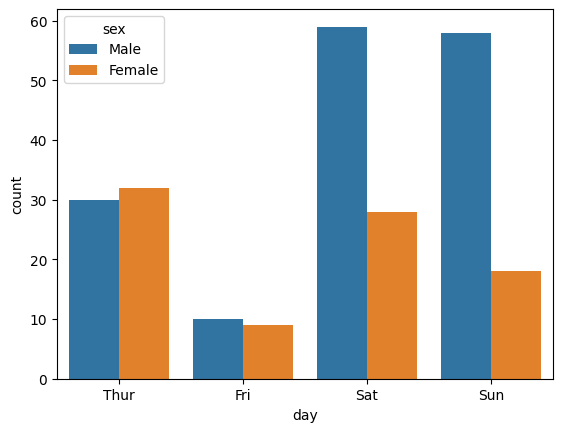

In [106]:
sns.countplot(data=tips, x='day', hue='sex')

plt.show()

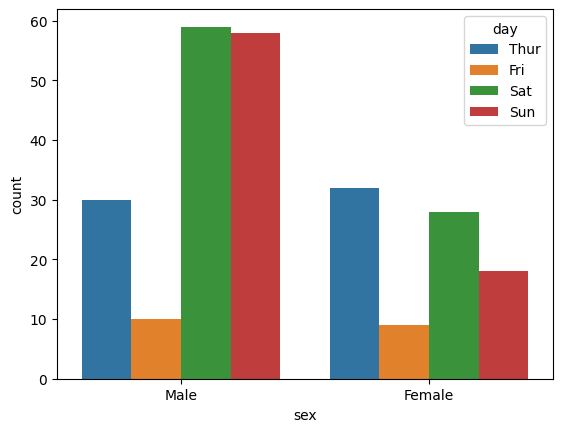

In [108]:
sns.countplot(data=tips, x='sex', hue='day')    # day는 카테고리의 내용인 목,금,토,일 순서로 정렬됨.

plt.show()

In [114]:
days = tips.day.cat.categories
for d in days:
    print(f'--- {d} ---')
    subset_df = tips[tips.day == d]
    print(subset_df.sex.value_counts())

--- Thur ---
sex
Female    32
Male      30
Name: count, dtype: int64
--- Fri ---
sex
Male      10
Female     9
Name: count, dtype: int64
--- Sat ---
sex
Male      59
Female    28
Name: count, dtype: int64
--- Sun ---
sex
Male      58
Female    18
Name: count, dtype: int64


In [124]:
# data_frame.groupby([cat1, cat2, ...]).colum_name.stat_func()
tips.groupby(by=['day', 'sex']).sex.count()

/tmp/ipython-input-124-2551925673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['day', 'sex']).sex.count()


day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

In [125]:
tips.groupby(by=['sex', 'day']).sex.count()

/tmp/ipython-input-125-4017018135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex', 'day']).sex.count()


sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: sex, dtype: int64

성별 흡연여부별 빈도수 막대 그래프

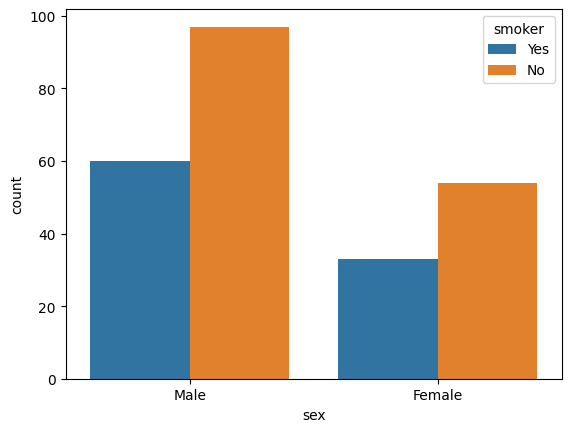

In [126]:
sns.countplot(data=tips, x='sex', hue='smoker')

plt.show()

In [127]:
tips.groupby(by=['sex', 'smoker']).sex.count()

/tmp/ipython-input-127-4123852135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex', 'smoker']).sex.count()


sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: sex, dtype: int64

## `barplot()`

* 그룹별 변수(숫자 타입)의 기술 통계량(예: 평균, 최댓값, ...)을 막대로 시각화.
* 카테고리(범주) 타입 변수와 연속형 변수를 함께 시각화.

성별 팁의 평균

In [137]:
tips.groupby(by=['sex']).tip.mean()

/tmp/ipython-input-137-1597742316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex']).tip.mean()


,tip
sex,
Male,3.089618
Female,2.833448


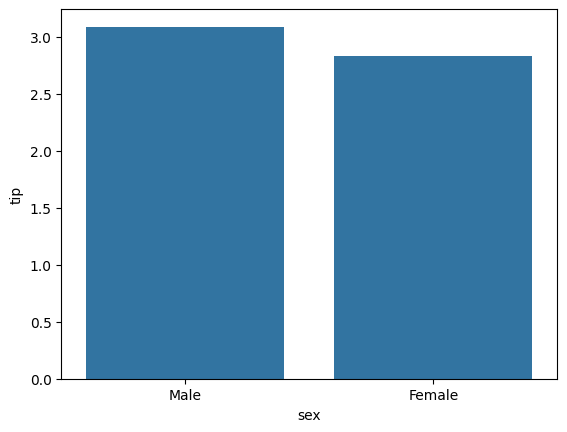

In [140]:
sns.barplot(data=tips, x='sex', y='tip', errorbar=None)
# estimator='mean' 이 기본값으로 설정되어 있어 막대의 높이(hegiht)는 평균값이 그려짐.
plt.show()

성별 팁의 중위값(50%)

In [142]:
tips.groupby(by=['sex']).tip.median()

/tmp/ipython-input-142-2991941893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['sex']).tip.median()


,tip
sex,
Male,3.00
Female,2.75


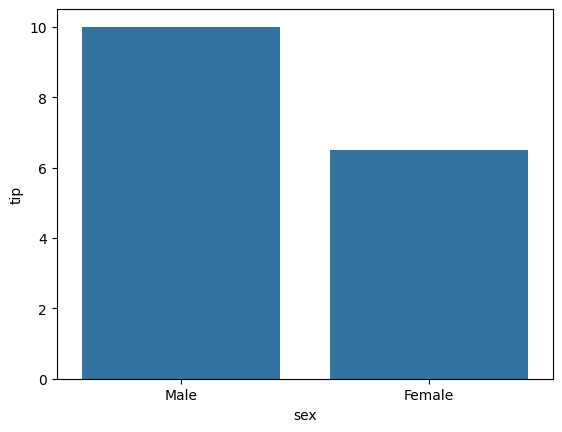

In [145]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', errorbar=None)
plt.show()

요일별 팁의 평균 가로 막대 그래프

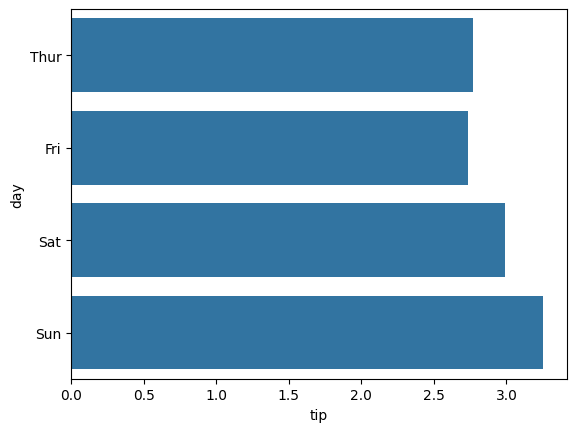

In [156]:
sns.barplot(data=tips, y='day', x='tip', errorbar=None)
plt.show()

In [155]:
tips.groupby(by=['day']).tip.mean()

/tmp/ipython-input-155-1238870240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['day']).tip.mean()


,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


요일별 성별 팁의 평균 세로 막대 그래프

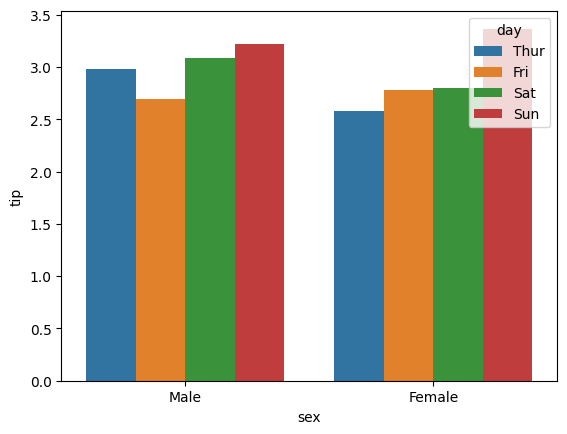

In [164]:
sns.barplot(data=tips, x='sex', y='tip', hue='day', errorbar=None)
plt.show()

In [158]:
tips.groupby(by=['day', 'sex']).tip.mean()

/tmp/ipython-input-158-3275852311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(by=['day', 'sex']).tip.mean()


day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

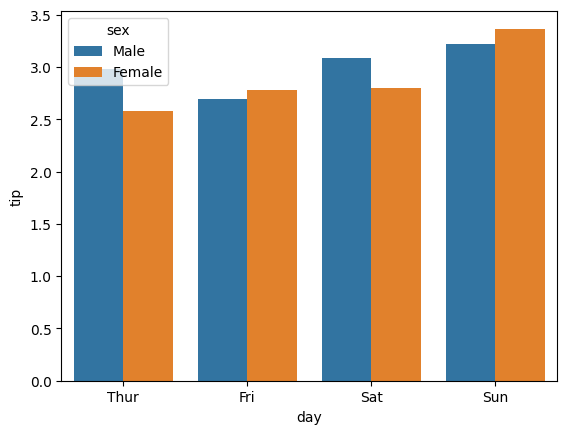

In [159]:
sns.barplot(data=tips, x='day', y='tip', hue='sex', errorbar=None)
plt.show()